# Oasis Infobyte Task no 4 by Varun Padha

Spam Email Prediction using Keras

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as plt

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1',usecols = ['v1', 'v2'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [27]:
df.describe()

,v1
count,5572.000000
mean,0.865937
std,0.340751
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [28]:
df.shape

(5572, 2)

In [31]:
df

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [32]:
import re
import nltk
nltk.download('popular')

[nltk_data] Error loading popular: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


False

In [34]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []

for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['v2'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)
X = cv.fit_transform(corpus).toarray()

In [37]:
y = pd.get_dummies(df['v1'])
y = y.iloc[:,1].values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [39]:
from sklearn.naive_bayes import MultinomialNB
spam_detection_model = MultinomialNB().fit(X_train, y_train)

In [40]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = spam_detection_model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.9865470852017937
F1 Score: 0.9865638647203537


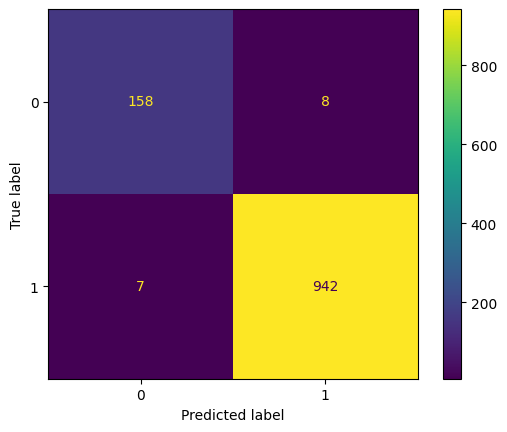

In [41]:
import matplotlib.pyplot as plt

labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();